<a href="https://colab.research.google.com/github/karthikdeepan23/MLDeploy/blob/master/Olympics_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install imblearn

In [ ]:
#!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
source_data = pd.read_csv('/content/Train_data.csv')

# Train Data reading 

In [ ]:
source_data.head(5)

,Sex,Age,Height,Weight,Team,Federation,Event,Year,Season,City,Sub Event,Grade,Id,GameID,Game,Record_Id
0,M,31.0,188.0,138.0,Bulgaria,BUL,2016 Summer,2016,down,Rio de Janeiro,Athletics Men's Shot Put,D+,candidate-40730,Game 1,Athletics,5da57331-62fe-418b-abfd-ca6ab0731709
1,F,28.0,166.0,62.0,Chinese Taipei,TPE,1996 Summer,1996,down,Atlanta,Table Tennis Women's Singles,D+,candidate-129936,Game 33,Table Tennis,0ae393f7-5e07-4b7c-b0cd-83edf259a069
2,M,30.0,NaN,NaN,Sweden,SWE,1960 Summer,1960,down,Roma,Rowing Men's Coxed Fours,D+,candidate-109667,Game 7,Rowing,3fec3204-ca6d-476f-ab89-e1189bc0eb35
3,F,28.0,181.0,80.0,China,CHN,2004 Summer,2004,down,Athina,Handball Women's Handball,D+,candidate-131637,Game 24,Handball,96cd09eb-b394-4c7d-8f7d-b3a0dc8cd870
4,F,16.0,175.0,54.0,Hungary,HUN,1996 Summer,1996,down,Atlanta,Swimming Women's 4 x 100 metres Medley Relay,D+,candidate-29360,Game 3,Swimming,bc158ecb-2fc5-4ffa-abd3-1075f4196044


In [ ]:
source_data.describe()

,Age,Height,Weight,Year
count,87551.000000,70842.000000,69933.000000,90725.000000
mean,25.472810,175.312301,70.688635,1978.515117
std,6.199255,10.522901,14.343667,29.834665
min,11.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [ ]:
source_data.dtypes

Sex            object
Age           float64
Height        float64
Weight        float64
Team           object
Federation     object
Event          object
Year            int64
Season         object
City           object
Sub Event      object
Grade          object
Id             object
GameID         object
Game           object
Record_Id      object
dtype: object

In [ ]:
source_data.select_dtypes(exclude=['float64','int64']).describe()

,Sex,Team,Federation,Event,Season,City,Sub Event,Grade,Id,GameID,Game,Record_Id
count,90725,90725,90725,90725,90725,90725,90725,90725,90725,90725,90725,90725
unique,2,909,227,51,2,42,754,4,64938,63,63,90725
top,M,United States,USA,2000 Summer,down,London,Football Men's Football,D+,candidate-52175,Game 1,Athletics,fef3a5f5-4cf1-4c03-ad63-92ff8eee4b7b
freq,65621,5886,6224,4703,74342,7466,1943,77485,15,12972,12972,1


In [ ]:
source_data.isnull().sum()

Sex               0
Age            3174
Height        19883
Weight        20792
Team              0
Federation        0
Event             0
Year              0
Season            0
City              0
Sub Event         0
Grade             0
Id                0
GameID            0
Game              0
Record_Id         0
dtype: int64

In [ ]:
for col in source_data.select_dtypes(exclude=['float64','int64']):
  print(len(source_data[col].unique()))

2
909
227
51
2
42
754
4
64938
63
63
90725


In [ ]:
print(source_data['Team'].value_counts())

United States    5886
France           3929
Great Britain    3820
Italy            3336
Canada           3110
                 ... 
Ravel               1
Martha-1            1
Salamander          1
Suzy-2              1
Clementine V        1
Name: Team, Length: 909, dtype: int64


In [ ]:
source_data[source_data['Federation']=='IND']['Federation'].value_counts()

IND    465
Name: Federation, dtype: int64

In [ ]:
gdp_df = pd.read_csv('/content/world_gdp.csv',skiprows=[0,1,2])

# Joining GDP and Population data to Train Data


In [ ]:
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10
1,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.924242e+09,1.965385e+09,2.173750e+09,2.156625e+09,2.126000e+09,2.335125e+09,2.101625e+09,1.139167e+09,7.094526e+08,1.228071e+09,1.985674e+09,2.424499e+09,3.314898e+09,2.359903e+09,2.707124e+09,3.414761e+09,3.632044e+09,4.060759e+09,4.435079e+09,5.746946e+09,7.314865e+09,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10
2,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,3.039835e+09,3.370843e+09,3.852116e+09,4.257219e+09,4.863487e+09,5.077222e+09,6.761786e+09,8.715106e+09,1.320971e+10,1.555793e+10,1.772835e+10,2.097190e+10,2.636449e+10,3.324342e+10,4.234528e+10,4.434867e+10,4.520709e+10,4.880137e+10,5.369828e+10,5.793787e+10,6.369630e+10,6.674227e+10,5.908907e+10,5.563149e+10,6.204510e+10,4.571537e+10,4.800330e+10,4.994646e+10,4.254257e+10,4.176405e+10,4.694150e+10,4.817786e+10,4.818775e+10,4.864057e+10,5.479025e+10,5.474471e+10,5.676029e+10,6.786383e+10,8.532500e+10,1.031980e+11,1.170270e+11,1.349770e+11,1.710010e+11,1.372110e+11,1.612070e+11,2.000190e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658740e+11,1.590490e+11
3,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.140000e+08,5.270000e+08,5.120000e+08,5.030000e+08,4.960000e+08,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08,6.113164e+08,7.214259e+08,7.954493e+08,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.434430e+09,1.496913e+09,1.733117e+09,2.398646e+09,2.935659e+09,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09


In [ ]:
gdp_df_fixed = gdp_df.melt(id_vars=['Country Name',	'Country Code',	'Indicator Name',	'Indicator Code'], value_vars=gdp_df.columns[4::])

In [ ]:
gdp_df_fixed

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
1,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
2,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,1960,2.723649e+09
3,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
...,...,...,...,...,...,...
12478,"Virgin Islands, US",VIR,GDP (current US$),NY.GDP.MKTP.CD,2016,NaN
12479,Palestine,PSE,GDP (current US$),NY.GDP.MKTP.CD,2016,1.339710e+10
12480,Yemen,YEM,GDP (current US$),NY.GDP.MKTP.CD,2016,2.731761e+10
12481,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2016,2.106399e+10


In [ ]:
gdp_df_fixed = gdp_df_fixed.rename({'variable':'Year','value':'GDP'}, axis=1)

In [ ]:
gdp_df_fixed = gdp_df_fixed.drop(['Country Name','Indicator Name','Indicator Code'], axis=1)

In [ ]:
gdp_df_fixed = gdp_df_fixed.rename({'Country Code':'Federation'}, axis=1)

In [ ]:
gdp_df_fixed['Year'] = gdp_df_fixed['Year'].apply(int)

In [ ]:
gdp_df_fixed.head(2)

,Federation,Year,GDP
0,AFG,1960,537777811.0
1,ALB,1960,NaN


In [ ]:
src_df = pd.merge(source_data, gdp_df_fixed, how='left', on=['Year','Federation'])

In [ ]:
src_df.head()

,Sex,Age,Height,Weight,Team,Federation,Event,Year,Season,City,Sub Event,Grade,Id,GameID,Game,Record_Id,GDP
0,M,31.0,188.0,138.0,Bulgaria,BUL,2016 Summer,2016,down,Rio de Janeiro,Athletics Men's Shot Put,D+,candidate-40730,Game 1,Athletics,5da57331-62fe-418b-abfd-ca6ab0731709,NaN
1,F,28.0,166.0,62.0,Chinese Taipei,TPE,1996 Summer,1996,down,Atlanta,Table Tennis Women's Singles,D+,candidate-129936,Game 33,Table Tennis,0ae393f7-5e07-4b7c-b0cd-83edf259a069,NaN
2,M,30.0,NaN,NaN,Sweden,SWE,1960 Summer,1960,down,Roma,Rowing Men's Coxed Fours,D+,candidate-109667,Game 7,Rowing,3fec3204-ca6d-476f-ab89-e1189bc0eb35,1.484287e+10
3,F,28.0,181.0,80.0,China,CHN,2004 Summer,2004,down,Athina,Handball Women's Handball,D+,candidate-131637,Game 24,Handball,96cd09eb-b394-4c7d-8f7d-b3a0dc8cd870,1.955350e+12
4,F,16.0,175.0,54.0,Hungary,HUN,1996 Summer,1996,down,Atlanta,Swimming Women's 4 x 100 metres Medley Relay,D+,candidate-29360,Game 3,Swimming,bc158ecb-2fc5-4ffa-abd3-1075f4196044,4.665980e+10


In [ ]:
pop_df = pd.read_csv('/content/world_pop.csv')

In [ ]:
pop_df.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277,89005,90853,92898,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999,19403676,20093756,20966463,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,9582156.0,9931562.0,10277321.0,10609042.0,10921037.0,11218268.0,11513968.0,11827237.0,12171441.0,12553446.0,12968345.0,13403734.0,13841301.0,14268994.0,14682284.0,15088981.0,15504318,15949766,16440924,16983266,17572649.0,18203369.0,18865716.0,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530,3108778,3089027,3060173,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142,64370,65390,67341,70049.0,73182.0,76244.0,78867.0,80991.0,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [ ]:
pop_df_fixed = pop_df.melt(id_vars=['Country','Country Code','Indicator Name','Indicator Code'], value_vars=pop_df.columns[4::])

In [ ]:
pop_df_fixed = pop_df_fixed.drop(['Country','Indicator Name','Indicator Code'], axis=1)

In [ ]:
pop_df_fixed = pop_df_fixed.rename({'Country Code':'Federation','variable':'Year','value':'Population'}, axis=1)

In [ ]:
pop_df_fixed['Year'] = pop_df_fixed['Year'].apply(int)

In [ ]:
pop_df_fixed.head(2)

,Federation,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0


In [ ]:
src_df_merged = pd.merge(src_df, pop_df_fixed, how='left', on=['Year','Federation'])

In [ ]:
src_df_merged.head(5)

,Sex,Age,Height,Weight,Team,Federation,Event,Year,Season,City,Sub Event,Grade,Id,GameID,Game,Record_Id,GDP,Population
0,M,31.0,188.0,138.0,Bulgaria,BUL,2016 Summer,2016,down,Rio de Janeiro,Athletics Men's Shot Put,D+,candidate-40730,Game 1,Athletics,5da57331-62fe-418b-abfd-ca6ab0731709,NaN,NaN
1,F,28.0,166.0,62.0,Chinese Taipei,TPE,1996 Summer,1996,down,Atlanta,Table Tennis Women's Singles,D+,candidate-129936,Game 33,Table Tennis,0ae393f7-5e07-4b7c-b0cd-83edf259a069,NaN,NaN
2,M,30.0,NaN,NaN,Sweden,SWE,1960 Summer,1960,down,Roma,Rowing Men's Coxed Fours,D+,candidate-109667,Game 7,Rowing,3fec3204-ca6d-476f-ab89-e1189bc0eb35,1.484287e+10,7.484656e+06
3,F,28.0,181.0,80.0,China,CHN,2004 Summer,2004,down,Athina,Handball Women's Handball,D+,candidate-131637,Game 24,Handball,96cd09eb-b394-4c7d-8f7d-b3a0dc8cd870,1.955350e+12,1.296075e+09
4,F,16.0,175.0,54.0,Hungary,HUN,1996 Summer,1996,down,Atlanta,Swimming Women's 4 x 100 metres Medley Relay,D+,candidate-29360,Game 3,Swimming,bc158ecb-2fc5-4ffa-abd3-1075f4196044,4.665980e+10,1.031124e+07


In [ ]:
src_df_merged.isnull().sum()

Sex               0
Age            3174
Height        19883
Weight        20792
Team              0
Federation        0
Event             0
Year              0
Season            0
City              0
Sub Event         0
Grade             0
Id                0
GameID            0
Game              0
Record_Id         0
GDP           42886
Population    39577
dtype: int64

In [ ]:
src_df_merged.describe()

,Age,Height,Weight,Year,GDP,Population
count,87551.000000,70842.000000,69933.000000,90725.000000,4.783900e+04,5.114800e+04
mean,25.472810,175.312301,70.688635,1978.515117,1.415233e+12,1.042806e+08
std,6.199255,10.522901,14.343667,29.834665,2.995464e+12,2.355962e+08
min,11.000000,127.000000,25.000000,1896.000000,3.933357e+07,1.003300e+04
25%,21.000000,168.000000,60.000000,1960.000000,6.061365e+10,1.021097e+07
50%,24.000000,175.000000,70.000000,1988.000000,2.891620e+11,3.749116e+07
75%,28.000000,183.000000,79.000000,2002.000000,1.308930e+12,6.563724e+07
max,97.000000,226.000000,214.000000,2016.000000,1.862450e+13,1.378665e+09


In [ ]:
src_df_merged = pd.concat([src_df_merged,pd.get_dummies(src_df_merged.Sex, prefix='Sex')],axis=1).drop('Sex',axis=1)

In [ ]:
src_df_merged.dtypes

Age           float64
Height        float64
Weight        float64
Team           object
Federation     object
Event          object
Year            int64
Season         object
City           object
Sub Event      object
Grade          object
Id             object
GameID         object
Game           object
Record_Id      object
GDP           float64
Population    float64
Sex_F           uint8
Sex_M           uint8
dtype: object

In [ ]:
# imputer = IterativeImputer()
# imputer.fit(src_df_merged.drop(['Team',	'Federation',	'Event,	Year',	'Season	City',	'Sub Event',	'Grade	Id'	,'GameID'	,'Game'	,'Record_Id',	'GDP',	'Population'],axis=1), random_state=0)
src_df_merged.head()

,Age,Height,Weight,Team,Federation,Event,Year,Season,City,Sub Event,Grade,Id,GameID,Game,Record_Id,GDP,Population,Sex_F,Sex_M
0,31.0,188.0,138.0,Bulgaria,BUL,2016 Summer,2016,down,Rio de Janeiro,Athletics Men's Shot Put,D+,candidate-40730,Game 1,Athletics,5da57331-62fe-418b-abfd-ca6ab0731709,NaN,NaN,0,1
1,28.0,166.0,62.0,Chinese Taipei,TPE,1996 Summer,1996,down,Atlanta,Table Tennis Women's Singles,D+,candidate-129936,Game 33,Table Tennis,0ae393f7-5e07-4b7c-b0cd-83edf259a069,NaN,NaN,1,0
2,30.0,NaN,NaN,Sweden,SWE,1960 Summer,1960,down,Roma,Rowing Men's Coxed Fours,D+,candidate-109667,Game 7,Rowing,3fec3204-ca6d-476f-ab89-e1189bc0eb35,1.484287e+10,7.484656e+06,0,1
3,28.0,181.0,80.0,China,CHN,2004 Summer,2004,down,Athina,Handball Women's Handball,D+,candidate-131637,Game 24,Handball,96cd09eb-b394-4c7d-8f7d-b3a0dc8cd870,1.955350e+12,1.296075e+09,1,0
4,16.0,175.0,54.0,Hungary,HUN,1996 Summer,1996,down,Atlanta,Swimming Women's 4 x 100 metres Medley Relay,D+,candidate-29360,Game 3,Swimming,bc158ecb-2fc5-4ffa-abd3-1075f4196044,4.665980e+10,1.031124e+07,1,0


# Data Pre-processing

## Engineered feature creation - Is_home_ground

In [ ]:
city_dict={'Rio de Janeiro':'BRA',
 'Atlanta':'USA',
 'Roma':'ITA',
 'Athina':'CRT',
 'London':'GBR',
 'Paris':'FRA',
 'Vancouver':'CAN',
 'Melbourne':'ANZ',
 'Lake Placid':'USA',
 'Moskva':'EUN',
 'Beijing':'CHN',
 'Montreal':'CAN',
 'Sochi':'EUN',
 'Sapporo':'JPN',
 'Los Angeles':'USA',
 'Calgary':'CAN',
 'Sydney':'ANZ',
 'Tokyo':'JPN',
 'Grenoble':'FRA',
 'Munich':'GDR',
 'Helsinki':'FIN',
 'Mexico City':'MEX',
 'Lillehammer':'NOR',
 'Barcelona':'ESP',
 "Cortina d'Ampezzo":'ITA',
 'Seoul':'KOR',
 'Innsbruck':'AUT',
 'Sarajevo':'YUG',
 'Antwerpen':'BEL',
 'St. Louis':'USA',
 'Torino':'ITA',
 'Salt Lake City':'USA',
 'Stockholm':'SWE',
 'Garmisch-Partenkirchen':'GDR',
 'Oslo':'NOR',
 'Berlin':'GDR',
 'Sankt Moritz':'SUI',
 'Amsterdam':'NED',
 'Squaw Valley':'USA',
 'Albertville':'FRA',
 'Chamonix':'FRA',
 'Nagano':'JAP'}

In [ ]:
src_df_merged['Home_Country']=src_df_merged['City'].map(city_dict)

In [ ]:
def is_home_ground(x):
  if x['Federation']==x['Home_Country']:
    return 1
  else:
    return 0

In [ ]:
src_df_merged['Is_home_grd'] =  src_df_merged.apply(func=is_home_ground, axis=1)

In [ ]:
src_df_merged['Is_home_grd'].value_counts()

0    85177
1     5548
Name: Is_home_grd, dtype: int64

In [ ]:
src_df_merged1 = src_df_merged.drop(['Team','Event','GameID','Record_Id','Id','Sub Event','Home_Country','City'],axis=1)

In [ ]:
src_df_merged1.head(5)

,Age,Height,Weight,Federation,Year,Season,Grade,Game,GDP,Population,Sex_F,Sex_M,Is_home_grd
0,31.00,188.00,138.00,BUL,2016,down,D+,Athletics,nan,nan,0,1,0
1,28.00,166.00,62.00,TPE,1996,down,D+,Table Tennis,nan,nan,1,0,0
2,30.00,nan,nan,SWE,1960,down,D+,Rowing,14842870293.00,7484656.00,0,1,0
3,28.00,181.00,80.00,CHN,2004,down,D+,Handball,1955350000000.00,1296075000.00,1,0,0
4,16.00,175.00,54.00,HUN,1996,down,D+,Swimming,46659796773.00,10311238.00,1,0,0


In [ ]:
src_df_merged1.dtypes

Age            float64
Height         float64
Weight         float64
Federation      object
Year             int64
Season          object
Grade           object
Game            object
GDP            float64
Population     float64
Sex_F            uint8
Sex_M            uint8
Is_home_grd      int64
dtype: object

In [ ]:
src_df_merged1.isna().sum()

Age             3174
Height         19883
Weight         20792
Federation         0
Year               0
Season             0
Grade              0
Game               0
GDP            42886
Population     39577
Sex_F              0
Sex_M              0
Is_home_grd        0
dtype: int64

In [ ]:
src_df_merged1.columns

Index(['Age', 'Height', 'Weight', 'Federation', 'Year', 'Season', 'Grade',
       'Game', 'GDP', 'Population', 'Sex_F', 'Sex_M', 'Is_home_grd'],
      dtype='object')

## Handling of missing values

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imputer = IterativeImputer(random_state=42, initial_strategy='median')
person_imputer = imputer.fit(src_df_merged1.drop(['Federation', 'Year', 'Season', 'Grade','Game', 'GDP', 'Population', 'Is_home_grd'],axis=1))

In [ ]:
person_imputed_val = person_imputer.transform(src_df_merged1.drop(['Federation', 'Year', 'Season', 'Grade','Game', 'GDP', 'Population', 'Is_home_grd'],axis=1))

In [ ]:
person_df = pd.DataFrame(person_imputed_val,columns=['Age','Height', 'Weight','Sex_F', 'Sex_M'])

In [ ]:
person_df

,Age,Height,Weight,Sex_F,Sex_M
0,31.00,188.00,138.00,0.00,1.00
1,28.00,166.00,62.00,1.00,0.00
2,30.00,179.35,77.18,0.00,1.00
3,28.00,181.00,80.00,1.00,0.00
4,16.00,175.00,54.00,1.00,0.00
...,...,...,...,...,...
90720,24.00,172.00,71.00,1.00,0.00
90721,16.00,153.00,44.00,1.00,0.00
90722,18.00,170.00,54.00,1.00,0.00
90723,23.00,173.00,68.00,1.00,0.00


In [ ]:
src_df_merged1['Age'] = person_df['Age']
src_df_merged1['Height'] = person_df['Height']
src_df_merged1['Weight'] = person_df['Weight']

In [ ]:
src_df_merged1.head(2)

,Age,Height,Weight,Federation,Year,Season,Grade,Game,GDP,Population,Sex_F,Sex_M,Is_home_grd
0,31.00,188.00,138.00,BUL,2016,down,D+,Athletics,nan,nan,0,1,0
1,28.00,166.00,62.00,TPE,1996,down,D+,Table Tennis,nan,nan,1,0,0


## Encoding Categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
fed_encoder = LabelEncoder().fit(src_df_merged1['Federation'])
season_encoder = LabelEncoder().fit(src_df_merged1['Season'])
game_encoder = LabelEncoder().fit(src_df_merged1['Game'])


src_df_merged1['Federation']= fed_encoder.transform(src_df_merged1['Federation'])
src_df_merged1['Season']= season_encoder.transform(src_df_merged1['Season'])
src_df_merged1['Game']= game_encoder.transform(src_df_merged1['Game'])



In [ ]:
src_df_merged1.head(5)

,Age,Height,Weight,Federation,Year,Season,Grade,Game,GDP,Population,Sex_F,Sex_M,Is_home_grd
0,31.00,188.00,138.00,32,2016,1,D+,4,nan,nan,0,1,0
1,28.00,166.00,62.00,202,1996,1,D+,53,nan,nan,1,0,0
2,30.00,179.35,77.18,191,1960,1,D+,40,14842870293.00,7484656.00,0,1,0
3,28.00,181.00,80.00,41,2004,1,D+,26,1955350000000.00,1296075000.00,1,0,0
4,16.00,175.00,54.00,90,1996,1,D+,51,46659796773.00,10311238.00,1,0,0


In [ ]:
import category_encoders as ce
ordinal_cols_mapping = [{
    "col":"Grade",    
    "mapping": {
        'A+':1, 
        'B+':2, 
        'C+':3,
        'D+':4
    }}]
grade_encoder = ce.OrdinalEncoder(mapping=ordinal_cols_mapping, cols=['Grade']).fit(src_df_merged1)


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
src_df_merged1 = grade_encoder.transform(src_df_merged1)


In [ ]:
src_df_merged1.head()

,Age,Height,Weight,Federation,Year,Season,Grade,Game,GDP,Population,Sex_F,Sex_M,Is_home_grd
0,31.00,188.00,138.00,32,2016,1,4,4,nan,nan,0,1,0
1,28.00,166.00,62.00,202,1996,1,4,53,nan,nan,1,0,0
2,30.00,179.35,77.18,191,1960,1,4,40,14842870293.00,7484656.00,0,1,0
3,28.00,181.00,80.00,41,2004,1,4,26,1955350000000.00,1296075000.00,1,0,0
4,16.00,175.00,54.00,90,1996,1,4,51,46659796773.00,10311238.00,1,0,0


In [ ]:
src_df_merged1.columns

Index(['Age', 'Height', 'Weight', 'Federation', 'Year', 'Season', 'Grade',
       'Game', 'GDP', 'Population', 'Sex_F', 'Sex_M', 'Is_home_grd'],
      dtype='object')

In [ ]:
imputer = IterativeImputer(random_state=42, initial_strategy='mean', max_iter=20)
gdp_pop_imputer = imputer.fit(src_df_merged1.drop(['Age','Height','Weight','Season','Grade','Game','Sex_F','Sex_M','Is_home_grd'],axis=1))

In [ ]:
gdp_pop_imputed_val = imputer.transform(src_df_merged1.drop(['Age', 'Height', 'Weight','Season', 'Grade','Game','Sex_F','Sex_M','Is_home_grd'],axis=1))

In [ ]:
gdp_pop_imputed_val

array([[3.20000000e+01, 2.01600000e+03, 1.38862394e+12, 1.04274930e+08],
       [2.02000000e+02, 1.99600000e+03, 1.38862394e+12, 1.04274930e+08],
       [1.91000000e+02, 1.96000000e+03, 1.48428703e+10, 7.48465600e+06],
       ...,
       [1.07000000e+02, 2.00000000e+03, 1.36969317e+09, 4.89840000e+06],
       [7.90000000e+01, 2.00800000e+03, 1.38862394e+12, 1.04274930e+08],
       [1.21000000e+02, 2.01600000e+03, 4.27388760e+10, 2.87229800e+06]])

In [ ]:
gdp_pop_df = pd.DataFrame(gdp_pop_imputed_val,columns=['Federation','Year', 'GDP','Population'])

In [ ]:
gdp_pop_df['Population'].value_counts()

104274929.53    383
104274929.56    363
104274929.53    327
256514000.00    327
244499000.00    305
               ... 
104274929.55      1
7024200.00        1
10872298.00       1
746314.00         1
5971000.00        1
Name: Population, Length: 3033, dtype: int64

In [ ]:
gdp_pop_df.head(20)

,Federation,Year,GDP,Population
0,32.00,2016.00,1388623936257.19,104274929.52
1,202.00,1996.00,1388623937787.87,104274929.56
2,191.00,1960.00,14842870293.00,7484656.00
3,41.00,2004.00,1955350000000.00,1296075000.00
4,90.00,1996.00,46659796773.00,10311238.00
5,191.00,1948.00,1388623937606.16,104274929.56
6,79.00,1900.00,1388623936495.12,104274929.53
7,79.00,2012.00,1388623936682.94,104274929.54
8,69.00,1900.00,1388623936403.11,104274929.53
9,79.00,2010.00,1388623936679.59,104274929.54


In [ ]:
src_df_merged1['GDP']=gdp_pop_df['GDP']
src_df_merged1['Population']=gdp_pop_df['Population']

In [ ]:
src_df_merged1.head()

,Age,Height,Weight,Federation,Year,Season,Grade,Game,GDP,Population,Sex_F,Sex_M,Is_home_grd
0,31.00,188.00,138.00,32,2016,1,4,4,1388623936257.19,104274929.52,0,1,0
1,28.00,166.00,62.00,202,1996,1,4,53,1388623937787.87,104274929.56,1,0,0
2,30.00,179.35,77.18,191,1960,1,4,40,14842870293.00,7484656.00,0,1,0
3,28.00,181.00,80.00,41,2004,1,4,26,1955350000000.00,1296075000.00,1,0,0
4,16.00,175.00,54.00,90,1996,1,4,51,46659796773.00,10311238.00,1,0,0


## Engineered feature creation - Per_capita and Is_dev

In [ ]:
src_df_merged1['Per_capita']= src_df_merged1['GDP']/src_df_merged1['Population']

In [ ]:
src_df_merged1['Is_dev']=src_df_merged1['Per_capita'].apply(lambda x:'1' if x>52000 else '0')

In [ ]:
src_df_merged1['Is_home_grd'].value_counts()

0    85177
1     5548
Name: Is_home_grd, dtype: int64

## SMOTE to handle Imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X = src_df_merged1.drop(['Grade','Age','Height','Weight','GDP','Population'], axis=1)
y = src_df_merged1.Grade

In [ ]:
X.head(2)

,Federation,Year,Season,Game,Sex_F,Sex_M,Is_home_grd,Per_capita,Is_dev
0,32,2016,1,4,0,1,0,13316.949171,0
1,202,1996,1,53,1,0,0,13316.949180,0


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train

,Federation,Year,Season,Game,Sex_F,Sex_M,Is_home_grd,Per_capita,Is_dev
57919,74,1976,1,25,1,0,0,4138.175700,0
39409,188,1948,1,11,0,1,0,13316.949179,0
60299,167,1980,1,30,0,1,0,45795.318273,0
13434,160,1968,1,12,0,1,0,32945.077328,0
37284,54,2012,1,40,0,1,0,19729.829884,0
...,...,...,...,...,...,...,...,...,...
6265,29,2016,1,30,0,1,1,8649.964931,0
54886,68,1984,1,4,0,1,0,10841.567129,0
76820,70,1972,1,4,1,0,0,13316.949172,0
860,174,1980,1,4,0,1,0,626.408699,0


In [ ]:
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_smote[1]

array([1.88000000e+02, 1.94800000e+03, 1.00000000e+00, 1.10000000e+01,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.33169492e+04,
       0.00000000e+00])

In [ ]:
from collections import Counter
print("Before smote", Counter(y_train))
print("After smote", Counter(y_train_smote))

Before smote Counter({4: 54260, 3: 3104, 1: 3100, 2: 3043})
After smote Counter({4: 54260, 3: 54260, 2: 54260, 1: 54260})


# Model Creation and experimenting with different Algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc_model = rfc.fit(X_train_smote,y_train_smote)

In [ ]:
pred = rfc_model.predict(X_test)
print(accuracy_score(y_test,pred))

0.8402160335072378


In [ ]:
confusion_matrix(y_test,pred)

array([[  704,   118,    71,   492],
       [  147,   551,    90,   536],
       [  118,    87,   503,   576],
       [  701,   719,   694, 21111]])

In [ ]:
confusion_matrix(y_test,pred)

array([[  704,   118,    71,   492],
       [  147,   551,    90,   536],
       [  118,    87,   503,   576],
       [  701,   719,   694, 21111]])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
rfc = GradientBoostingClassifier(random_state=42)
rfc_model = rfc.fit(X_train_smote,y_train_smote)
pred = rfc_model.predict(X_test)
print(accuracy_score(y_test,pred))
print("Gradient Boosting +  SMOTE \n", classification_report(y_test,pred,digits=3))

0.71430670879565
Gradient Boosting +  SMOTE 
               precision    recall  f1-score   support

           1      0.173     0.380     0.238      1385
           2      0.142     0.199     0.166      1324
           3      0.102     0.150     0.121      1284
           4      0.903     0.795     0.845     23225

    accuracy                          0.714     27218
   macro avg      0.330     0.381     0.343     27218
weighted avg      0.791     0.714     0.747     27218



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
rfc = GradientBoostingClassifier(random_state=42)
rfc_model = rfc.fit(X_train,y_train)
pred = rfc_model.predict(X_test)
print(accuracy_score(y_test,pred))
print("Gradient Boosting without SMOTE \n", classification_report(y_test,pred,digits=3))

0.8536630171210229
Gradient Boosting without SMOTE 
               precision    recall  f1-score   support

           1      0.455     0.007     0.014      1385
           2      0.500     0.001     0.002      1324
           3      1.000     0.002     0.003      1284
           4      0.854     1.000     0.921     23225

    accuracy                          0.854     27218
   macro avg      0.702     0.252     0.235     27218
weighted avg      0.823     0.854     0.787     27218



#Model Selection and Model Evaluvation

In [ ]:
# The class imblance is seen where D+ be the Majority class and A+, B+, C+ combined be the minority class
# Hence tried to match Class imbalance using SMOTE, but I see that there is drop in Accuracy and F1 Score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc_model = rfc.fit(X_train_smote,y_train_smote)
pred = rfc_model.predict(X_test)
print('='*150+'\nModel with Smote\n'+'='*150)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred,digits=3))
matrix = confusion_matrix(y_test,pred)
print('Per class accuracy', matrix.diagonal()/matrix.sum(axis=1))

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc_model = rfc.fit(X_train,y_train)
pred = rfc_model.predict(X_test)
print('='*150+'\nModel without Smote\n'+'='*150)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred,digits=3))
matrix = confusion_matrix(y_test,pred)
print('Per class accuracy', matrix.diagonal()/matrix.sum(axis=1))

Model with Smote
0.8402160335072378
[[  704   118    71   492]
 [  147   551    90   536]
 [  118    87   503   576]
 [  701   719   694 21111]]
              precision    recall  f1-score   support

           1      0.422     0.508     0.461      1385
           2      0.374     0.416     0.394      1324
           3      0.370     0.392     0.381      1284
           4      0.929     0.909     0.919     23225

    accuracy                          0.840     27218
   macro avg      0.524     0.556     0.539     27218
weighted avg      0.850     0.840     0.845     27218

Per class accuracy [0.50830325 0.41616314 0.39174455 0.9089774 ]
Model without Smote
0.8770666470717907
[[  588    58    49   690]
 [   72   456    46   750]
 [   75    45   407   757]
 [  259   243   302 22421]]
              precision    recall  f1-score   support

           1      0.592     0.425     0.494      1385
           2      0.569     0.344     0.429      1324
           3      0.506     0.317     0.390 

In [ ]:
#based on above, the Per Class accuracy with smote is    [0.50830325 0.41767372 0.39096573 0.908676] and overall score of 0.834
            #    and Per Class accuracy without smote is [0.42454874 0.34441088 0.31697819 0.96538213] and overall score of 0.877
#Based on above, if our final prediction requires that we need to correctly predict A+, B+, C+ grades better, we can take the SMOTED model
          #   OR if our final prediction requires that we need to correctly predict all four classes, then we can take the SMOTE LESS model            

In [ ]:
# Even though as per provided problem statement, it is just that we need to predict labels for all four classes, I take the SMOTED model as because,
# it is predicting the minor classes better with less impact to overall accuracy

In [ ]:
# Fitting the whole test data to create final model
X_smote, y_smote = smote.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Before smote", Counter(y))
print("After smote", Counter(y_smote))

Before smote Counter({4: 77485, 1: 4485, 3: 4388, 2: 4367})
After smote Counter({4: 77485, 3: 77485, 2: 77485, 1: 77485})


# Final Model creation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
final_model = rfc.fit(X,y)


# Transforming the Prediction data

In [ ]:
test_data = pd.read_csv('/content/Test_data.csv')

In [ ]:
test_data.head()

,Sex,Age,Height,Weight,Team,Federation,Event,Year,Season,City,Sub Event,Id,GameID,Game,Record_Id
0,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,down,Athina,Cycling Men's 333 metres Time Trial,candidate-98663,Game 5,Cycling,0e08dc19-1611-4701-84b2-e67e031febfe
1,M,20.0,NaN,NaN,Great Britain/Germany,GER,1896 Summer,1896,down,Athina,Tennis Men's Doubles,candidate-38391,Game 28,Tennis,16c28bd8-e98e-4faf-9a20-65db7ce7d6b7
2,M,33.0,NaN,NaN,Foxhunters Hurlingham,GBR,1900 Summer,1900,down,Paris,Polo Men's Polo,candidate-4908,Game 55,Polo,d0dbb0f3-c381-415e-a3e3-746f49c764f3
3,M,25.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,FRA,1900 Summer,1900,down,Paris,Rugby Men's Rugby,candidate-12950,Game 53,Rugby,0dd6ebbe-3656-453a-9e96-9923c1b17a67
4,M,21.0,NaN,NaN,Devon and Somerset Wanderers,GBR,1900 Summer,1900,down,Paris,Cricket Men's Cricket,candidate-61508,Game 58,Cricket,9493ce7e-253b-4fec-b3a6-f71acae3273e


In [ ]:
test_data.loc[1580,'Federation']='ZIM'
test_data.loc[5,'Game']="Jeu De Paume"
test_data.loc[453,'Game']="Jeu De Paume"

In [ ]:
test_data_mod = pd.merge(test_data, gdp_df_fixed, how='left', on=['Year','Federation'])
test_data_mod = pd.merge(test_data_mod, pop_df_fixed, how='left', on=['Year','Federation'])
test_data_mod = pd.concat([test_data_mod,pd.get_dummies(test_data_mod.Sex, prefix='Sex')],axis=1).drop('Sex',axis=1)
test_data_mod['Home_Country']= test_data_mod['City'].map(city_dict)
test_data_mod['Is_home_grd'] = test_data_mod.apply(func=is_home_ground, axis=1)
test_data_mod = test_data_mod.drop(['Team','Event','GameID','Record_Id','Id','Sub Event','Home_Country','City'],axis=1)
test_data_mod['Federation']= fed_encoder.transform(test_data_mod['Federation'])
test_data_mod['Season']= season_encoder.transform(test_data_mod['Season'])
test_data_mod['Game']= game_encoder.transform(test_data_mod['Game'])
gdp_pop_imputed_val_test = imputer.transform(test_data_mod.drop(['Age', 'Height', 'Weight','Season','Game','Sex_F','Sex_M','Is_home_grd'],axis=1))
gdp_pop_test_df = pd.DataFrame(gdp_pop_imputed_val_test,columns=['Federation','Year', 'GDP','Population'])
test_data_mod['GDP']=gdp_pop_test_df['GDP']
test_data_mod['Population']=gdp_pop_test_df['Population']
test_data_mod['Per_capita']= test_data_mod['GDP']/test_data_mod['Population']
test_data_mod['Is_dev']=test_data_mod['Per_capita'].apply(lambda x:'1' if x>52000 else '0')
X_Pred = test_data_mod.drop(['Age','Height','Weight','GDP','Population'], axis=1)


In [ ]:
predictions = final_model.predict(X_Pred)

#Predictions

In [ ]:
predictions

array([1, 4, 1, ..., 4, 4, 4])

In [ ]:
mapping= {1:'A+', 2:'B+', 3:'C+',4:'D+'}

In [ ]:
grades = list(map(mapping.get,predictions))

In [ ]:
output = pd.DataFrame(data=test_data.Record_Id,columns=['Record_Id'])

In [ ]:
output['Grade']=grades
output

,Record_Id,Grade
0,0e08dc19-1611-4701-84b2-e67e031febfe,A+
1,16c28bd8-e98e-4faf-9a20-65db7ce7d6b7,D+
2,d0dbb0f3-c381-415e-a3e3-746f49c764f3,A+
3,0dd6ebbe-3656-453a-9e96-9923c1b17a67,A+
4,9493ce7e-253b-4fec-b3a6-f71acae3273e,A+
...,...,...
8969,ad1e3f17-4b9b-4701-a965-f9a8dfd1d430,D+
8970,5e337b0b-794f-4244-bcfc-f2f80fc29552,D+
8971,bc1f8788-1a1a-4c1b-a756-a89cfc391b71,D+
8972,3daf7f0c-d9da-453e-aba4-5c4d2c03a7d8,D+


In [ ]:
output.to_csv('output.csv',index=False)

In [ ]:
src_df_merged.head()

,Age,Height,Weight,Team,Federation,Event,Year,Season,City,Sub Event,Grade,Id,GameID,Game,Record_Id,GDP,Population,Sex_F,Sex_M,Home_Country,Is_home_grd
0,31.0,188.0,138.0,Bulgaria,BUL,2016 Summer,2016,down,Rio de Janeiro,Athletics Men's Shot Put,D+,candidate-40730,Game 1,Athletics,5da57331-62fe-418b-abfd-ca6ab0731709,NaN,NaN,0,1,BRA,0
1,28.0,166.0,62.0,Chinese Taipei,TPE,1996 Summer,1996,down,Atlanta,Table Tennis Women's Singles,D+,candidate-129936,Game 33,Table Tennis,0ae393f7-5e07-4b7c-b0cd-83edf259a069,NaN,NaN,1,0,USA,0
2,30.0,NaN,NaN,Sweden,SWE,1960 Summer,1960,down,Roma,Rowing Men's Coxed Fours,D+,candidate-109667,Game 7,Rowing,3fec3204-ca6d-476f-ab89-e1189bc0eb35,1.484287e+10,7.484656e+06,0,1,ITA,0
3,28.0,181.0,80.0,China,CHN,2004 Summer,2004,down,Athina,Handball Women's Handball,D+,candidate-131637,Game 24,Handball,96cd09eb-b394-4c7d-8f7d-b3a0dc8cd870,1.955350e+12,1.296075e+09,1,0,CRT,0
4,16.0,175.0,54.0,Hungary,HUN,1996 Summer,1996,down,Atlanta,Swimming Women's 4 x 100 metres Medley Relay,D+,candidate-29360,Game 3,Swimming,bc158ecb-2fc5-4ffa-abd3-1075f4196044,4.665980e+10,1.031124e+07,1,0,USA,0


# How different is the participation and performance of female candidates from federations in various events, game ID etc?

In [ ]:
df = pd.DataFrame(src_df_merged[src_df_merged['Sex_F']==1].groupby('Federation')['Sex_F'].count().sort_values(ascending=False))

In [ ]:
df = df.reset_index()


In [ ]:
df.head(10)

,Federation,Sex_F
0,USA,1827
1,CAN,1232
2,GBR,1104
3,GER,999
4,JPN,955
5,AUS,938
6,CHN,917
7,FRA,889
8,ITA,803
9,RUS,747


In [ ]:
import seaborn as sns
sns.set_palette("dark")
sns.set(rc={'figure.figsize':(40,25)})


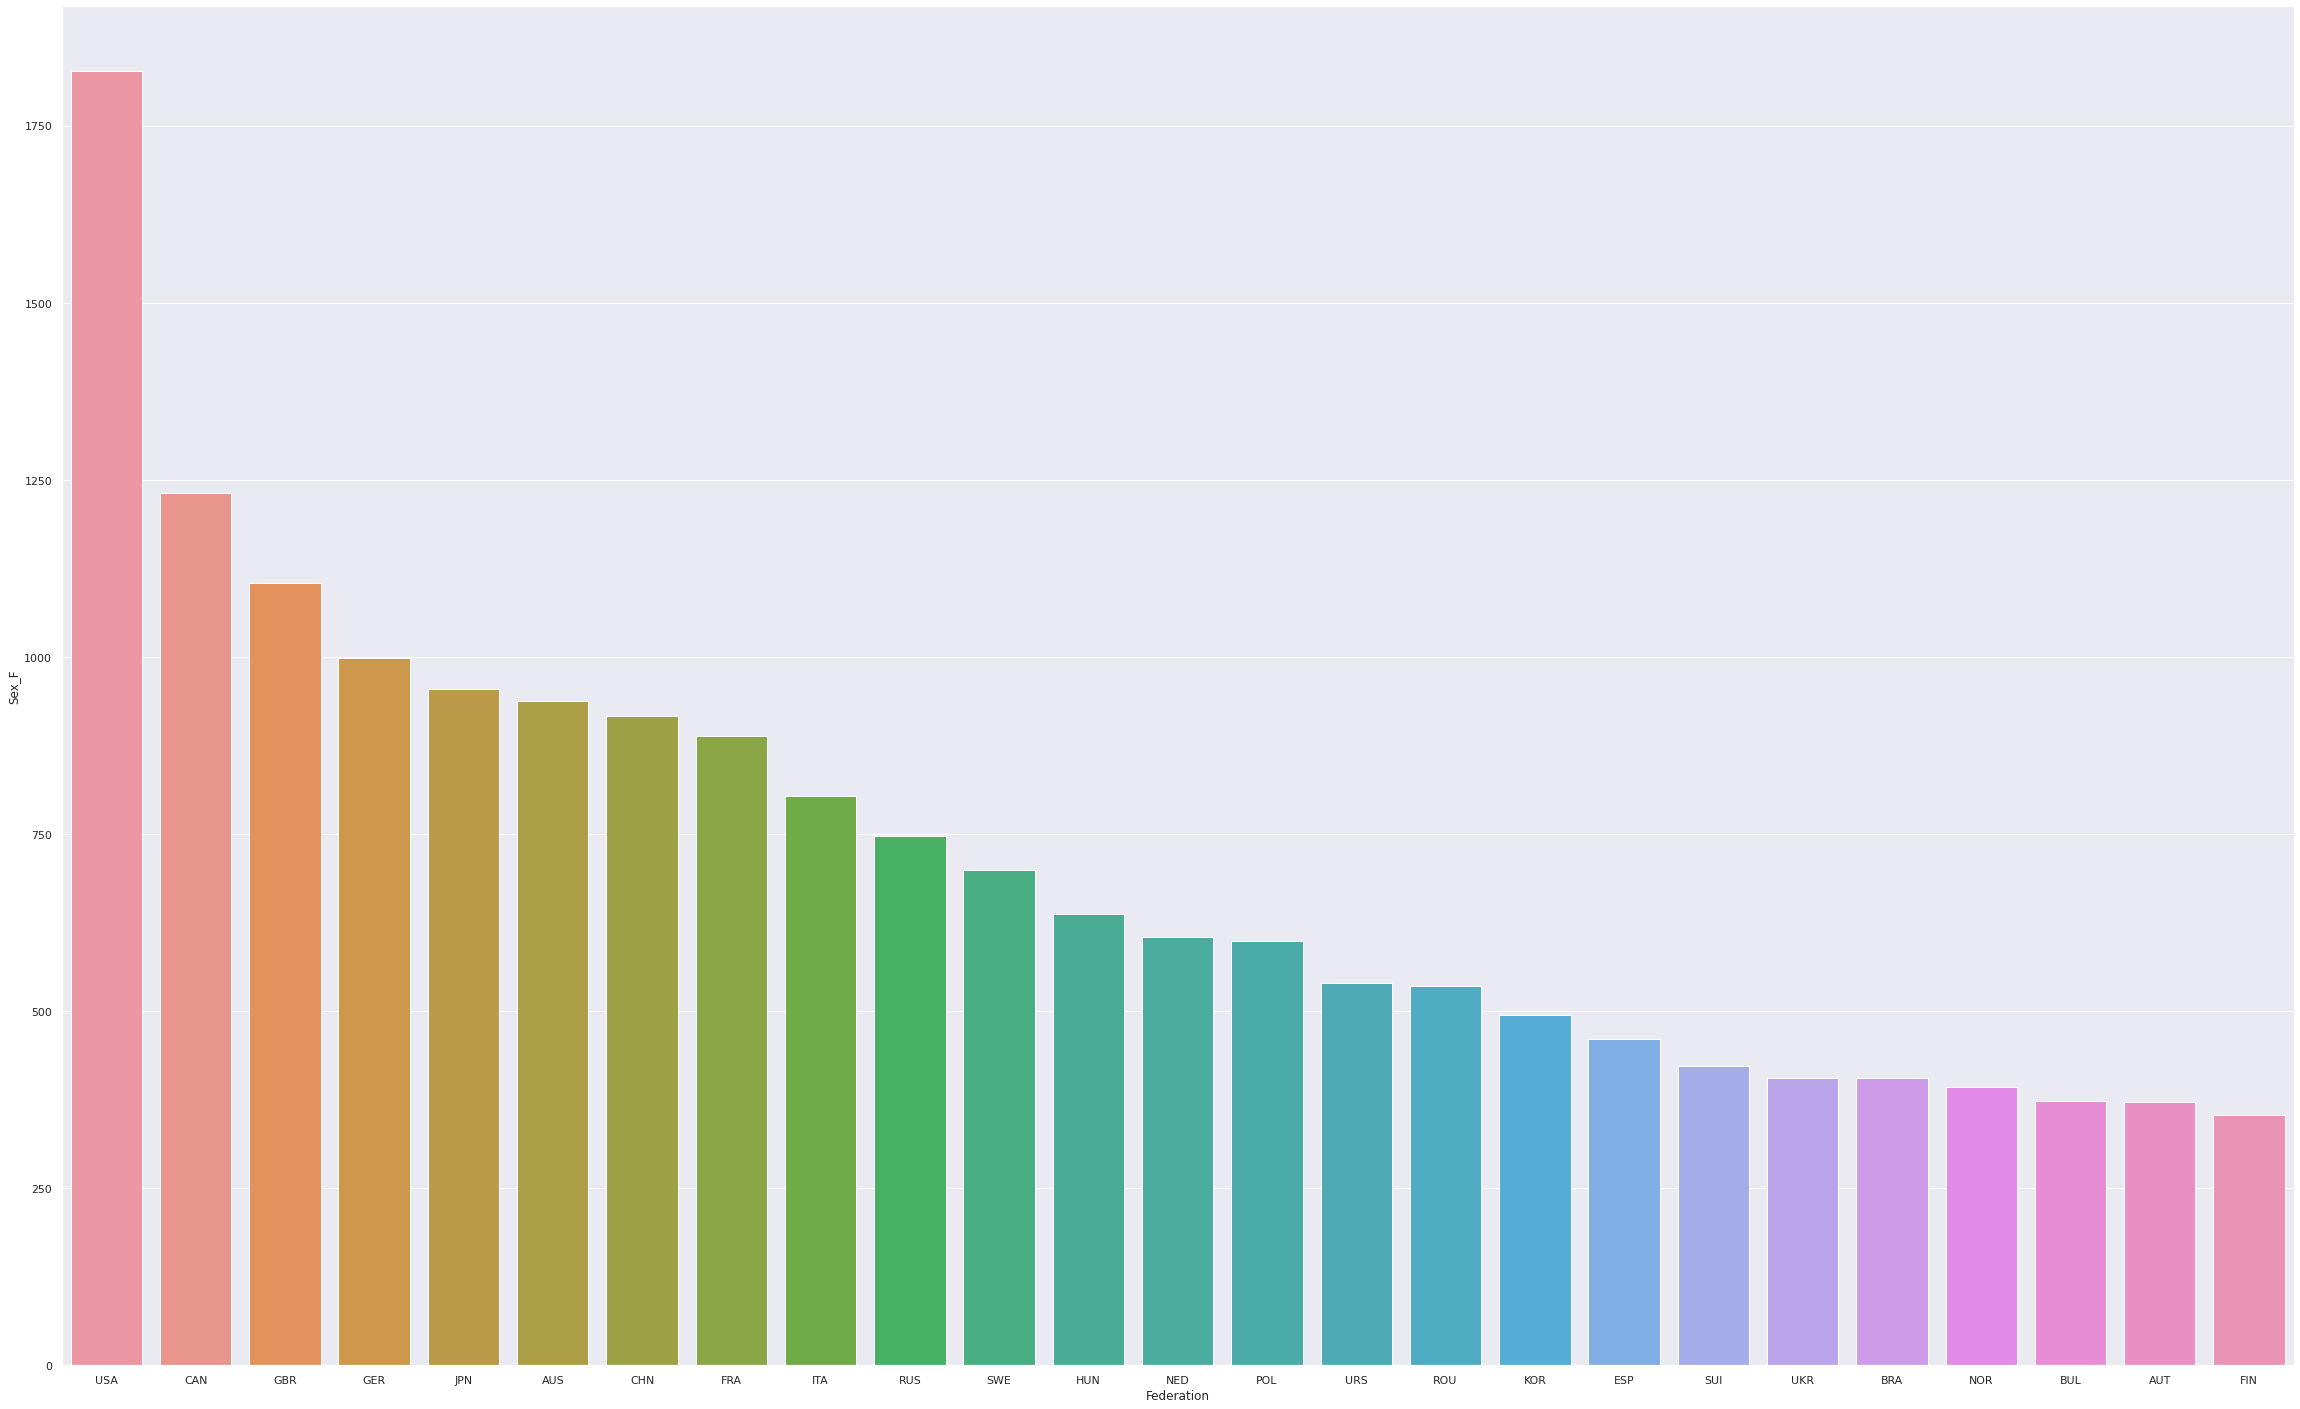

In [ ]:
sns.barplot(x='Federation',y='Sex_F',data=df.head(25))

In [ ]:
# From the data it is seen that, USA, Canada, UK, Germany and Japan are the top countries where Female candidates takes part most in Olympics

In [ ]:
win_data = src_df_merged[src_df_merged['Sex_F']==1].groupby('Federation')['Grade'].value_counts().unstack(level=-1).fillna(0).sort_values(['A+','B+','C+'],ascending=[False,False,False])

In [ ]:
win_data

Grade,A+,B+,C+,D+
Federation,,,,
USA,297.00,170.00,141.00,1219.00
URS,113.00,55.00,65.00,306.00
GER,75.00,71.00,82.00,771.00
GDR,72.00,44.00,35.00,164.00
AUS,69.00,75.00,66.00,728.00
...,...,...,...,...
VAN,0.00,0.00,0.00,4.00
VIE,0.00,0.00,0.00,27.00
VIN,0.00,0.00,0.00,5.00


In [ ]:
win_data['Total_candidates']=win_data['A+']+win_data['B+']+win_data['C+']+win_data['D+']
win_data['Total_medals']=win_data['A+']+win_data['B+']+win_data['C+']
win_data['chance_hitting_medal']=(win_data['A+']+win_data['B+']+win_data['C+'])/win_data['Total_candidates']

In [ ]:
win_data.sort_values(['Total_medals'],ascending=False).head(5)

Grade,A+,B+,C+,D+,Total_candidates,Total_medals,chance_hitting_medal
Federation,,,,,,,
USA,297.00,170.00,141.00,1219.00,1827.00,608.00,0.33
URS,113.00,55.00,65.00,306.00,539.00,233.00,0.43
GER,75.00,71.00,82.00,771.00,999.00,228.00,0.23
AUS,69.00,75.00,66.00,728.00,938.00,210.00,0.22
CHN,62.00,84.00,57.00,714.00,917.00,203.00,0.22


In [ ]:
# From the data, it is seen that Top 5 Medal winning countries with Female Participation are USA, Russia, Germany, Australia and China

In [ ]:
win_data[win_data['Total_medals']>200].sort_values(['chance_hitting_medal'],ascending=False).head(5)

Grade,A+,B+,C+,D+,Total_candidates,Total_medals,chance_hitting_medal
Federation,,,,,,,
URS,113.00,55.00,65.00,306.00,539.00,233.00,0.43
USA,297.00,170.00,141.00,1219.00,1827.00,608.00,0.33
GER,75.00,71.00,82.00,771.00,999.00,228.00,0.23
AUS,69.00,75.00,66.00,728.00,938.00,210.00,0.22
CHN,62.00,84.00,57.00,714.00,917.00,203.00,0.22


In [ ]:
# From the data, it is seen that among Female participants among Federations, Percentage of hitting a medal based on the number of candidates sent by Federation, Top 5 countries are
# 1. Russia 2.USA 3.Germany 4.Austrilia 5.China (Minimum of 200 medals are considered in order to arrive at the data)

# Study factors that affect Grades of a federation in accordance with GDP and population as well

In [ ]:
df_2 = src_df_merged1

In [ ]:
df_2.head(2)

,Age,Height,Weight,Federation,Year,Season,Grade,Game,GDP,Population,Sex_F,Sex_M,Is_home_grd,Per_capita,Is_dev
0,31.00,188.00,138.00,32,2016,1,4,4,1388623936257.19,104274929.52,0,1,0,13316.95,0
1,28.00,166.00,62.00,202,1996,1,4,53,1388623937787.87,104274929.56,1,0,0,13316.95,0


In [ ]:
df_2['Federation'] = fed_encoder.inverse_transform(df_2['Federation'])

In [ ]:
df_2['Grade']=list(map(mapping.get,df_2['Grade']))

In [ ]:
df_2.head()

,Age,Height,Weight,Federation,Year,Season,Grade,Game,GDP,Population,Sex_F,Sex_M,Is_home_grd,Per_capita,Is_dev
0,31.00,188.00,138.00,BUL,2016,1,D+,4,1388623936257.19,104274929.52,0,1,0,13316.95,0
1,28.00,166.00,62.00,TPE,1996,1,D+,53,1388623937787.87,104274929.56,1,0,0,13316.95,0
2,30.00,179.35,77.18,SWE,1960,1,D+,40,14842870293.00,7484656.00,0,1,0,1983.11,0
3,28.00,181.00,80.00,CHN,2004,1,D+,26,1955350000000.00,1296075000.00,1,0,0,1508.67,0
4,16.00,175.00,54.00,HUN,1996,1,D+,51,46659796773.00,10311238.00,1,0,0,4525.14,0


In [ ]:
#I created Per_capita feature (GDP/population), lets analyze how grades of federation is affected by Per_capita

In [ ]:
medal_counts = df_2.groupby('Federation')['Grade'].value_counts().unstack(level=-1).fillna(0)

In [ ]:
medal_counts.head()

Grade,A+,B+,C+,D+
Federation,,,,
AFG,0.00,0.00,2.00,43.00
AHO,0.00,1.00,0.00,28.00
ALB,0.00,0.00,0.00,26.00
ALG,2.00,1.00,3.00,167.00
AND,0.00,0.00,0.00,58.00


In [ ]:
economy_df = df_2.groupby('Federation')['GDP','Population','Per_capita'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
economy_df.head()

,GDP,Population,Per_capita
Federation,,,
AFG,583753324175.74,47839615.87,12363.45
AHO,1388623935913.66,104274929.52,13316.95
ALB,78288129132.43,2978373.62,34160.31
ALG,1388623935958.75,104274929.52,13316.95
AND,1631901151.12,60394.84,23383.24


In [ ]:
df_21 = pd.merge(medal_counts,economy_df,how='left',left_index=True,right_index=True)
df_21

,A+,B+,C+,D+,GDP,Population,Per_capita
Federation,,,,,,,
AFG,0.00,0.00,2.00,43.00,583753324175.74,47839615.87,12363.45
AHO,0.00,1.00,0.00,28.00,1388623935913.66,104274929.52,13316.95
ALB,0.00,0.00,0.00,26.00,78288129132.43,2978373.62,34160.31
ALG,2.00,1.00,3.00,167.00,1388623935958.75,104274929.52,13316.95
AND,0.00,0.00,0.00,58.00,1631901151.12,60394.84,23383.24
...,...,...,...,...,...,...,...
YEM,0.00,0.00,0.00,10.00,19441964345.80,19475765.30,914.02
YMD,0.00,0.00,0.00,2.00,1388623937967.68,104274929.57,13316.95
YUG,41.00,62.00,22.00,765.00,1388623937935.95,104274929.57,13316.95


In [ ]:
df_21['Total_medals']=df_21['A+']+df_21['B+']+df_21['C+']

In [ ]:
df_21.sort_values('Per_capita',ascending=False).head(10)

,A+,B+,C+,D+,GDP,Population,Per_capita,Total_medals
Federation,,,,,,,,
NRU,0.00,0.00,0.00,7.00,655968347993.22,10082.86,65265884.43,0.00
SMR,0.00,0.00,0.00,58.00,807754243861.99,22934.12,37443679.88,0.00
LIE,1.00,0.00,1.00,109.00,366958199836.72,15054526.25,8537481.26,2.00
GUM,0.00,0.00,0.00,37.00,721314440160.89,142519.73,5259643.62,0.00
CHI,2.00,3.00,7.00,301.00,1017900124077.96,43392117.79,3206446.22,12.00
STP,0.00,0.00,0.00,3.00,306530827518.37,179475.33,2211020.80,0.00
DJI,0.00,0.00,0.00,12.00,538088380902.25,765707.25,786059.08,0.00
MLT,0.00,0.00,0.00,45.00,424134532998.87,21152667.71,449058.84,0.00
EST,5.00,5.00,6.00,289.00,407786942263.10,16906620.23,134765.55,16.00


In [ ]:
d.sort_values('Per_capita',ascending=False).head(10)

,A+,B+,C+,D+,GDP,Population,Per_capita,Total_medals,per_capita_per_medal
Federation,,,,,,,,,
PRK,5.00,9.00,16.00,270.00,1010469006013.69,20437932.51,50946.97,30.00,1698.23
HUN,145.00,118.00,129.00,1855.00,830766404482.98,42022481.49,39447.94,392.00,100.63
NOR,124.00,121.00,87.00,1345.00,591417137738.21,38660060.08,29031.92,332.00,87.45
AUS,127.00,161.00,165.00,2122.00,638034014747.20,28185967.18,24441.05,453.00,53.95
USA,889.00,533.00,440.00,4362.00,5904061404341.81,208465524.01,23405.37,1862.00,12.57
ROU,45.00,59.00,99.00,1280.00,646006772290.10,33462943.59,23248.85,203.00,114.53
JPN,88.00,105.00,131.00,2558.00,2864461214823.85,116837012.39,23101.00,324.00,71.30
CAN,155.00,135.00,146.00,2816.00,870440334599.09,40971345.86,22501.18,436.00,51.61
CUB,58.00,38.00,39.00,692.00,285730781095.97,16949034.16,21239.86,135.00,157.33


In [ ]:
d.head(10)

,A+,B+,C+,D+,GDP,Population,Per_capita,Total_medals,per_capita_per_medal
Federation,,,,,,,,,
ARG,31.00,20.00,34.00,1032.00,556382594734.46,51259071.82,9625.40,85.00,113.24
AUS,127.00,161.00,165.00,2122.00,638034014747.20,28185967.18,24441.05,453.00,53.95
AUT,50.00,60.00,54.00,1587.00,585715876556.02,40210969.42,19111.13,164.00,116.53
AZE,3.00,7.00,11.00,84.00,35887053428.60,8939589.60,3892.30,21.00,185.35
BEL,29.00,60.00,56.00,1161.00,877702903516.15,63255912.60,16385.31,145.00,113.00
BLR,8.00,15.00,26.00,562.00,37246741291.53,9750270.52,3881.33,49.00,79.21
BRA,32.00,61.00,58.00,1093.00,1040877898774.69,157844382.14,6294.79,151.00,41.69
BUL,16.00,57.00,44.00,1106.00,1388623936196.29,104274929.52,13316.95,117.00,113.82
CAN,155.00,135.00,146.00,2816.00,870440334599.09,40971345.86,22501.18,436.00,51.61


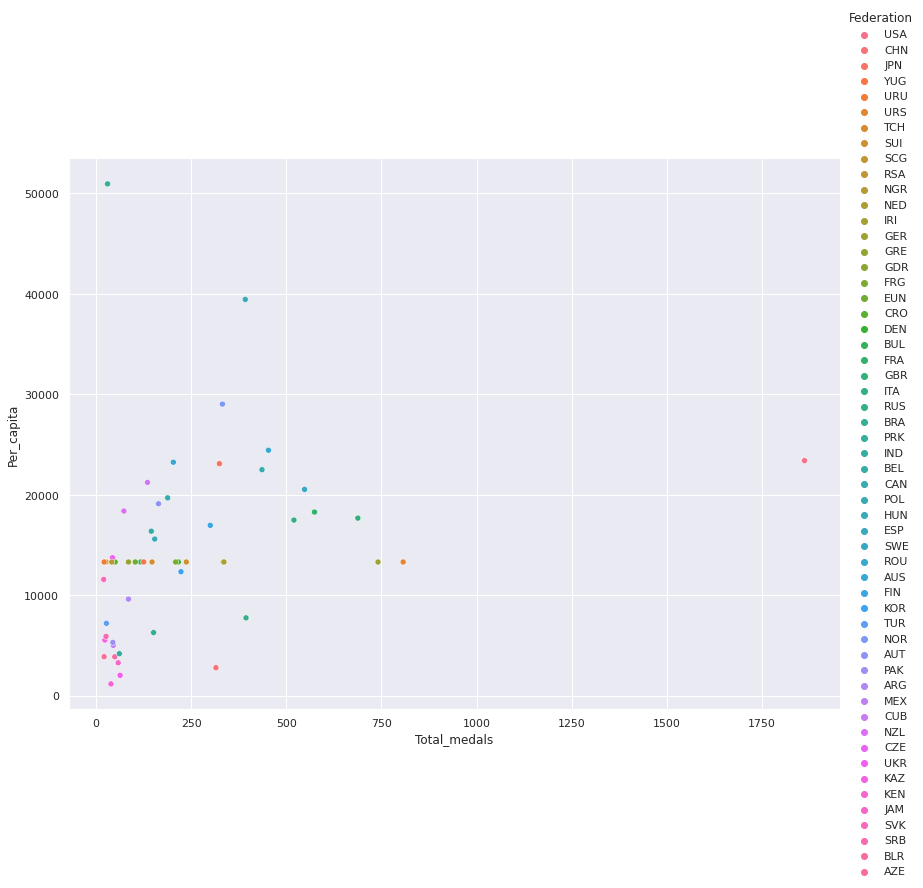

In [ ]:
sns.relplot(x='Total_medals',y='Per_capita',hue='Federation',hue_order=d.sort_values(['GDP'],ascending=False).index,data=d,height=8.27, aspect=11.7/8.27)

In [ ]:
d['per_capita_per_medal']= d['Per_capita']/d['Total_medals']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
d_22 = d.sort_values(["per_capita_per_medal"])

In [ ]:
d_22.head(5)

,A+,B+,C+,D+,GDP,Population,Per_capita,Total_medals,per_capita_per_medal
Federation,,,,,,,,,
CHN,110.00,115.00,90.00,1388.00,3435249850277.52,1229053563.02,2796.53,315.00,8.88
USA,889.00,533.00,440.00,4362.00,5904061404341.81,208465524.01,23405.37,1862.00,12.57
URS,354.00,245.00,208.00,1092.00,1388623937828.43,104274929.57,13316.95,807.00,16.50
GER,260.00,224.00,257.00,2512.00,1388623936623.59,104274929.53,13316.95,741.00,17.97
RUS,126.00,123.00,145.00,1338.00,1085632462967.44,142518034.10,7757.99,394.00,19.69


In [ ]:
d_22.tail(5)

,A+,B+,C+,D+,GDP,Population,Per_capita,Total_medals,per_capita_per_medal
Federation,,,,,,,,,
SCG,5.00,11.00,9.00,87.00,1388623937528.34,104274929.56,13316.95,25.00,532.68
IRI,7.00,6.00,11.00,252.00,1388623936774.89,104274929.54,13316.95,24.00,554.87
SVK,7.00,6.00,7.00,343.00,62482611278.72,5388909.96,11581.35,20.00,579.07
URU,10.00,0.00,11.00,171.00,1388623937831.21,104274929.57,13316.95,21.00,634.14
PRK,5.00,9.00,16.00,270.00,1010469006013.69,20437932.51,50946.97,30.00,1698.23


In [ ]:
#As we can see in the above data,  countries with (low Per_capita/Medal) are doing best in the segment and vice-versa
# Top countries where Federations are getting medals with less cost of Per_capita/medal ratio:
# 1.China, 2.USA, 3.Russia, 4.Germany, 5.Russia

# Top countries where Federations are getting medals with more cost of Per_capita/medal ratio:
# 1.North Korea, 2.Uruguay, 3.Slovakia, 4.Iran, 5.Serbia

# Which federation has the most performing candidates? What aspects of GDP and Population differ from other federations?

In [ ]:
df_23 = df_21

In [ ]:
df_23.sort_values('Total_medals',ascending=False)

,A+,B+,C+,D+,GDP,Population,Per_capita,Total_medals
Federation,,,,,,,,
USA,889.00,533.00,440.00,4362.00,5904061404341.81,208465524.01,23405.37,1862.00
URS,354.00,245.00,208.00,1092.00,1388623937828.43,104274929.57,13316.95,807.00
GER,260.00,224.00,257.00,2512.00,1388623936623.59,104274929.53,13316.95,741.00
GBR,218.00,246.00,224.00,3413.00,1297923474453.38,75956189.48,17683.17,688.00
FRA,165.00,201.00,208.00,3607.00,1360622283148.16,76970283.26,18288.49,574.00
...,...,...,...,...,...,...,...,...
DJI,0.00,0.00,0.00,12.00,538088380902.25,765707.25,786059.08,0.00
NIG,0.00,0.00,0.00,11.00,1388623937287.29,104274929.55,13316.95,0.00
DMA,0.00,0.00,0.00,7.00,332173305.00,70843.57,4686.14,0.00


In [ ]:
# Based on above data, Top 5 performing Federations are 
# 1.USA, 2.Russia, 3.Germany, 4.UK, 5.France

# To talk about GDP and Population of these Federations, we can consider Per_capita
# We can infer that these top 5 federations have Per_capita ranging from 13k to 23k USD with a relatively good population 7M to 20M.
# Hence they are able to send a bulk of Candidates to Olympics and also as they have Good GDP_per_capita, they are able to invest in Sports 
#                                                                        to prodvide adeuqate infrastructure and training, hence the result

# What are the best performing events for these federations? 

In [ ]:
df_4 = src_df_merged1

In [ ]:
df_4

,Age,Height,Weight,Federation,Year,Season,Grade,Game,GDP,Population,Sex_F,Sex_M,Is_home_grd,Per_capita,Is_dev
0,31.00,188.00,138.00,BUL,2016,1,D+,4,1388623936257.19,104274929.52,0,1,0,13316.95,0
1,28.00,166.00,62.00,TPE,1996,1,D+,53,1388623937787.87,104274929.56,1,0,0,13316.95,0
2,30.00,179.35,77.18,SWE,1960,1,D+,40,14842870293.00,7484656.00,0,1,0,1983.11,0
3,28.00,181.00,80.00,CHN,2004,1,D+,26,1955350000000.00,1296075000.00,1,0,0,1508.67,0
4,16.00,175.00,54.00,HUN,1996,1,D+,51,46659796773.00,10311238.00,1,0,0,4525.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90720,24.00,172.00,71.00,CAN,2012,1,C+,22,1824290000000.00,34750545.00,1,0,0,52496.73,1
90721,16.00,153.00,44.00,USA,1972,0,D+,21,1282450000000.00,209896000.00,1,0,0,6109.93,0
90722,18.00,170.00,54.00,KGZ,2000,1,D+,51,1369693171.00,4898400.00,1,0,0,279.62,0
90723,23.00,173.00,68.00,GER,2008,1,B+,40,1388623936676.24,104274929.54,1,0,0,13316.95,0


In [ ]:
df_41 = df_4.drop(['Age','Height','Weight','Year','Season','GDP','Population','Sex_F','Sex_M','Is_home_grd'],axis=1)

In [ ]:
df_41.groupby(['Federation','Game'])['Grade'].value_counts().unstack(level=-1).fillna(0)

Grade             A+   B+   C+    D+
Federation Game                     
AFG        4    0.00 0.00 0.00 10.00
           11   0.00 0.00 0.00  2.00
           22   0.00 0.00 0.00  7.00
           27   0.00 0.00 0.00  6.00
           54   0.00 0.00 2.00  1.00
...              ...  ...  ...   ...
ZIM        40   0.00 0.00 0.00  1.00
           43   0.00 0.00 0.00  3.00
           44   0.00 0.00 0.00  6.00
           51   0.00 2.00 0.00 15.00
           55   0.00 0.00 0.00  6.00

[3519 rows x 4 columns]

In [ ]:
df_42 = df_41.groupby(['Federation','Game'])['Grade'].value_counts().unstack(level=-1).fillna(0).reset_index()
df_42

Grade,Federation,Game,A+,B+,C+,D+
0,AFG,4,0.00,0.00,0.00,10.00
1,AFG,11,0.00,0.00,0.00,2.00
2,AFG,22,0.00,0.00,0.00,7.00
3,AFG,27,0.00,0.00,0.00,6.00
4,AFG,54,0.00,0.00,2.00,1.00
...,...,...,...,...,...,...
3514,ZIM,40,0.00,0.00,0.00,1.00
3515,ZIM,43,0.00,0.00,0.00,3.00
3516,ZIM,44,0.00,0.00,0.00,6.00
3517,ZIM,51,0.00,2.00,0.00,15.00


In [ ]:
df_42 = df_42.rename_axis(None, axis=1)

In [ ]:
df_42['Medal_each_game']=df_42['A+']+df_42['B+']+df_42['C+']

In [ ]:
df_43 = df_42.drop(['A+',	'B+',	'C+',	'D+'	],axis=1)

In [ ]:
df_43.head(10)

,Federation,Game,Medal_each_game
0,AFG,4,0.00
1,AFG,11,0.00
2,AFG,22,0.00
3,AFG,27,0.00
4,AFG,54,2.00
5,AFG,62,0.00
6,AHO,4,0.00
7,AHO,10,0.00
8,AHO,20,0.00
9,AHO,22,0.00


In [ ]:
df_43.loc[df_43.groupby('Federation')['Medal_each_game'].idxmax()].sort_values(['Medal_each_game'],ascending=False)

,Federation,Game,Medal_each_game
3335,USA,4,366.00
179,AUS,51,140.00
522,CAN,28,118.00
1689,ITA,20,109.00
1191,GBR,4,103.00
...,...,...,...
2325,NIG,4,0.00
765,CYP,0,0.00
847,DJI,4,0.00
2251,NCA,4,0.00


In [ ]:
#Based on above data, we can see that Best Performing events for each Federation
# USA- Atletics
# Australia- Swimming
# Canada - Ice Hockey
# Italy - Fencing
# UK - Atletics

# List down the features including any engineered features that are significant for classification

In [ ]:
# I had used 2 Engineered features 
# 1. Per_Capita - (GDP/Population) - This is always a factor which describes Economy of a country which directly affects Olympic medals
# 2. Is_dev (Is_developed country or not: Boolean type) - Used Per_capita(GDP/Population) value to come up with this.  per_capita >52000 USD, I kept it as Developed country.
     # A Developed country will always fund on Sports, Sport's infrastructure, so that the Athelets will make their country proud.
# 3. Is_home_ground - Across different olympic games, we have seen that there is always a slight advantage for the home country (Environmnet, Domestic Crowd support etc.,)
     # to perform better in the game.  Hence came up with this feature



# What are the commonalities between federations?

In [ ]:
# Federations can actually grouped by Developed Country or not (Is_dev feature) and also by GDP per capita (Per_capita feature)
# The Federations which are well developed have performed well and Vice-versa

# List down appropriate evaluation metrics for the model that you might consider

In [ ]:
# This is actually a Multi-Class Classification task where the Classes are imbalanced.  
# 'D+' is the majority class and 'A','B','C' are minority class
# So the best accuracy metric we can use is 'Per Class Accuracy', Calculating accuracy for each label rather than going with 'Overall accuracy '


# Even though as per provided problem statement, it is just that we need to predict labels for all four classes, I took the SMOTED model as because,
# it is predicting the minor classes better with less impact to 'overall accuracy'